In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import multiprocessing 
%run Funciones_CSPSA_SPSA.ipynb
%matplotlib inline

In [2]:
# Ganancias estandar

#s = 0.602
#t = 0.101
#A = 0
#a = 3
#b = 0.1


# Ganancias asintoticas

s = 1
t = 0.166
A = 0
a = 3
b = 0.1


In [3]:
d = 2
nu_par = 1
NU_IT = 500

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [4]:
psi_est = estado(d,nu_par)

#psi_bloch = est_bloch(psi_est)[0]
#phase = float(est_bloch(psi_est)[1])
#theta = float(est_bloch(psi_est)[2])

In [5]:
H = H_paul(A,B,C)

In [6]:
fun = lambda x : exp_H(x, H)

In [7]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [8]:
#Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [9]:
#Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [10]:
#Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [11]:
#error_CSPSA = abs(Result_CSPSA - Ground_teo)
#error_SPSA = abs(Result_SPSA - Ground_teo)
#error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)

In [12]:
#plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
#plt.loglog(np.array(error_SPSA[:]).T, label='SPSA')
#plt.loglog(np.array(error_SPSA_ang[:]).T, label='SPSA_ang')
#plt.legend()

In [13]:
#plt.plot(np.array(Result_CSPSA[:]).T)
#plt.loglog(np.array(error_CSPSA[:]).T)

In [14]:
#plt.plot(np.array(Result_SPSA[:]).T)
#plt.loglog(np.array(error_SPSA[:]).T)

In [15]:
#plt.plot(np.array(Result_SPSA_ang[:]).T)
#plt.loglog(np.array(error_SPSA_ang[:]).T)

In [16]:
#plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')
#plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
#plt.xlim(0,100)
#plt.ylim(-7,-4)
#plt.legend()

In [17]:
# numero de realizaciones para promediar

num = 500


x = range(0,num)
y = len(x)


In [18]:
def multiprocessing_func(i):
    
    Result_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    Result_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    Result_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.single)

    error_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    error_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.single)
    error_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.single)
     
    psi_est = estado(d,nu_par)
    Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)
    Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)
    Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A, b)
    
    error_CSPSA = abs(Result_CSPSA - Ground_teo)
    error_SPSA = abs(Result_SPSA - Ground_teo)
    error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)
    
    Result_CSPSA_ar = np.insert(Result_CSPSA_ar, 0, Result_CSPSA, axis=0)
    Result_SPSA_ar = np.insert(Result_SPSA_ar, 0, Result_SPSA, axis=0)
    Result_SPSA_ang_ar = np.insert(Result_SPSA_ang_ar, 0, Result_SPSA_ang, axis=0)
    
    error_CSPSA_ar = np.insert(error_CSPSA_ar, 0, error_CSPSA, axis=0)
    error_SPSA_ar = np.insert(error_SPSA_ar, 0, error_SPSA, axis=0)
    error_SPSA_ang_ar = np.insert(error_SPSA_ang_ar, 0, error_SPSA_ang, axis=0)
    
    return Result_CSPSA_ar, Result_SPSA_ar, Result_SPSA_ang_ar, error_CSPSA_ar, error_SPSA_ar, error_SPSA_ang_ar

In [19]:
if __name__ == '__main__':
    
    pool = multiprocessing.Pool()
    p = pool.map(multiprocessing_func, x)
    pool.close()
    

In [20]:
Results = np.array(p)

In [21]:
Result_CSPSA_ar = Results[:,0,:,:,:]
Result_SPSA_ar = Results[:,1,:,:,:]
Result_SPSA_ang_ar = Results[:,2,:,:,:]

error_CSPSA_ar = Results[:,3,:,:,:]
error_SPSA_ar = Results[:,4,:,:,:]
error_SPSA_ang_ar = Results[:,5,:,:,:]

In [22]:
Result_CSPSA_pro = np.sum(Result_CSPSA_ar, axis=0)/y
Result_SPSA_pro = np.sum(Result_SPSA_ar, axis=0)/y
Result_SPSA_ang_pro = np.sum(Result_SPSA_ang_ar, axis=0)/y
error_CSPSA_pro = np.sum(error_CSPSA_ar, axis=0)/y
error_SPSA_pro = np.sum(error_SPSA_ar, axis=0)/y
error_SPSA_ang_pro = np.sum(error_SPSA_ang_ar, axis=0)/y


In [23]:
Result_CSPSA = Result_CSPSA_pro[0,0,:]
Result_SPSA = Result_SPSA_pro[0,0,:]
Result_SPSA_ang = Result_SPSA_ang_pro[0,0,:]
error_CSPSA = error_CSPSA_pro[0,0,:]
error_SPSA = error_SPSA_pro[0,0,:]
error_SPSA_ang = error_SPSA_ang_pro[0,0,:]

In [24]:
#plt.loglog(np.array(error_CSPSA_pro[:]).T)

In [25]:
#plt.loglog(np.array(error_SPSA_pro[:]).T)

In [26]:
#plt.loglog(np.array(error_SPSA_ang_pro[:]).T)

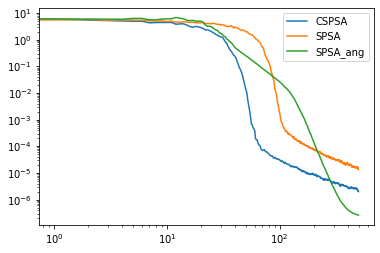

In [27]:
plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
plt.loglog(np.array(error_SPSA[:]).T, label='SPSA')
plt.loglog(np.array(error_SPSA_ang[:]).T, label='SPSA_ang')
plt.legend()

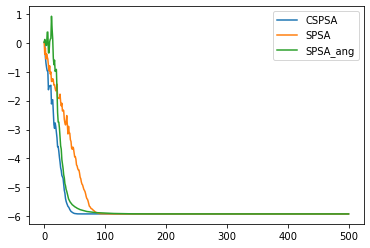

In [28]:
plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
plt.plot(np.array(Result_SPSA[:]).T, label='SPSA')
plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')

#plt.xlim(0,90)
#plt.ylim(-6.5,-4)
plt.legend()

In [29]:
#np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
#print(Result_SPSA)

In [30]:
#np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
#print(Result_CSPSA)

In [31]:
#np.savetxt('prueba.txt', Result_SPSA_ang, delimiter=',')
#print(Result_SPSA_ang)